In [1]:
from grey_model import GreyModel
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

# Set font sizes
plt.rcParams.update({'font.size': 14})  # Default font size
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

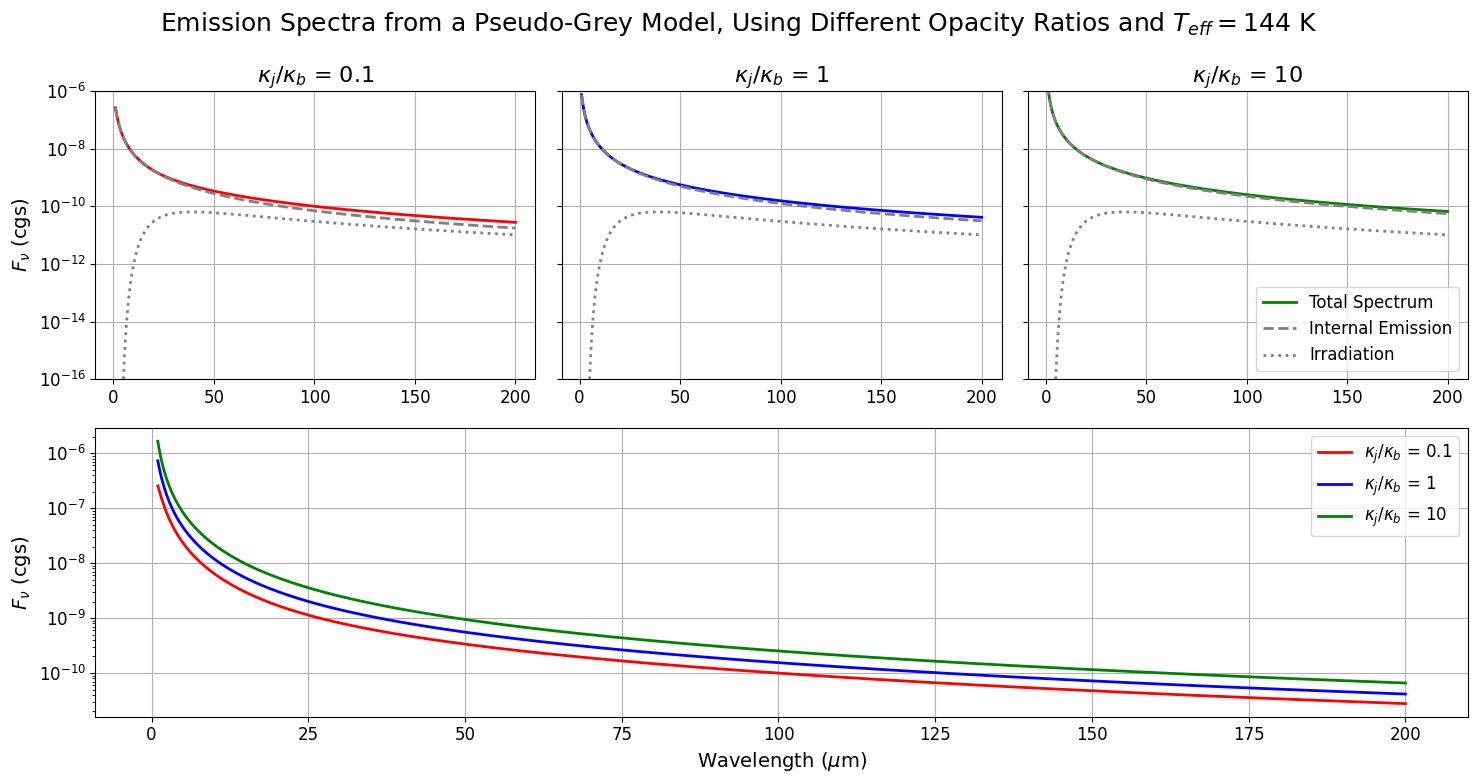

In [2]:
kappa_ratios = [0.1, 1, 10]
cols = ['r', 'b', 'g']
fig = plt.figure(figsize=(15, 8))

# Create grid: 2 rows, 3 columns with shared y-axis for top row
# Top row: 3 individual plots with shared y-axis
axes_top = []
for i in range(3):
    if i == 0:
        ax = plt.subplot(2, 3, i+1)
        axes_top.append(ax)
    else:
        ax = plt.subplot(2, 3, i+1, sharey=axes_top[0])
        axes_top.append(ax)

# Bottom row: 1 plot spanning all 3 columns
ax_bottom = plt.subplot(2, 1, 2)

# Store data for the bottom plot
total_spectra = []
wavelengths = None

for i, kappa_ratio in enumerate(kappa_ratios):
    model = GreyModel(kappa_ratio=kappa_ratio, D=1e8, include_molecules=False)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)
    
    # Store for bottom plot
    total_spectra.append(spec)
    if wavelengths is None:
        wavelengths = wavelength
    
    # Top row individual plots
    axes_top[i].semilogy(wavelength, spec, cols[i], linewidth=2, label='Total Spectrum')
    axes_top[i].semilogy(wavelength, local, 'gray', linewidth=2, label='Internal Emission', linestyle='--')
    axes_top[i].semilogy(wavelength, irr, 'gray', linewidth=2, label='Irradiation', linestyle=':')
    axes_top[i].set_title(f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}', fontsize=title_fontsize)
    axes_top[i].grid()
    axes_top[i].set_ylim(10**-16, 10**-6)
    axes_top[i].tick_params(axis='x', which='major', labelsize=12)
    
    # Only show y-axis label and tick labels on the leftmost plot
    if i == 0:
        axes_top[i].set_ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)
        axes_top[i].tick_params(axis='y', which='major', labelsize=12)
    else:
        # Hide y-axis tick labels for middle and right plots
        axes_top[i].tick_params(axis='y', which='major', labelleft=False)

# Bottom plot: all total spectra together
colors = ['red', 'blue', 'green']
for i, (kappa_ratio, spec) in enumerate(zip(kappa_ratios, total_spectra)):
    ax_bottom.semilogy(wavelengths, spec, color=colors[i], linewidth=2, 
                      label=f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}')

ax_bottom.set_xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
ax_bottom.set_ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)
ax_bottom.legend(fontsize=legend_fontsize)
ax_bottom.grid()
ax_bottom.tick_params(axis='both', which='major', labelsize=12)

# Add legend only to the last top plot
axes_top[2].legend(loc='lower right', fontsize=legend_fontsize)

fig.suptitle('Emission Spectra from a Pseudo-Grey Model, Using Different Opacity Ratios and $T_{eff}=144$ K', fontsize=18)
plt.tight_layout()
#plt.savefig('figures/spectrum_comparison.png', dpi=200, bbox_inches='tight')
plt.show()

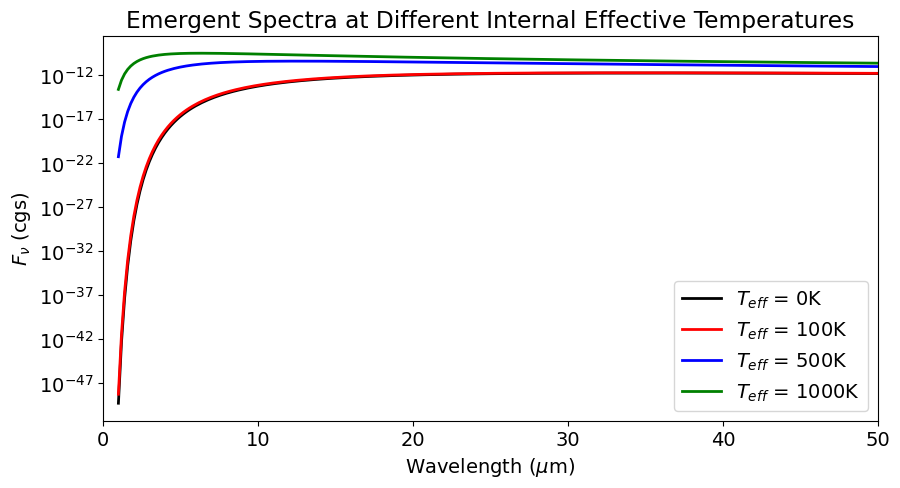

In [3]:
temperatures = [0, 100, 500, 1000]
cols = ['k', 'r', 'b', 'g']
plt.figure(figsize=(10,5))

for i, t in enumerate(temperatures):
    model = GreyModel(Teff=t, kappa_ratio=1, D=1e12, include_molecules=False)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)
    
    # Top row individual plots
    plt.semilogy(wavelength, spec, color=cols[i], linewidth=2, label=f'$T_{{eff}}$ = {t}K')
    plt.xlim(0,50)
    plt.legend()
    plt.title('Emergent Spectra at Different Internal Effective Temperatures')
    plt.xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
    plt.ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)

[GreyModel] apply_opacs: Loading opacities...
[GreyModel] load_opacities: Starting...
[GreyModel] load_opacities: Opening Ross_Planck_opac.fits...
[GreyModel] load_opacities: Opening rho_Ui_mu_ns_ne.fits...
[GreyModel] load_opacities: Setting up grids and interpolators...
[GreyModel] load_opacities: Solving ODE for pressure profile...
[GreyModel] load_opacities: Done.
[GreyModel] apply_opacs: Calculating kappa_nu_bars for 50 tau points...
[GreyModel] spectrum: Calculating tau_nu for 1000 frequencies...
[GreyModel] spectrum: tau_nu done
[GreyModel] spectrum: Calculating Planck function for 50 tau points...
[GreyModel] spectrum: Computing final vectorized sum...
[GreyModel] apply_opacs: Loading opacities...
[GreyModel] load_opacities: Starting...
[GreyModel] load_opacities: Using cached result.
[GreyModel] apply_opacs: Calculating kappa_nu_bars for 50 tau points...
[GreyModel] spectrum: Calculating tau_nu for 1000 frequencies...
[GreyModel] spectrum: tau_nu done
[GreyModel] spectrum: Cal

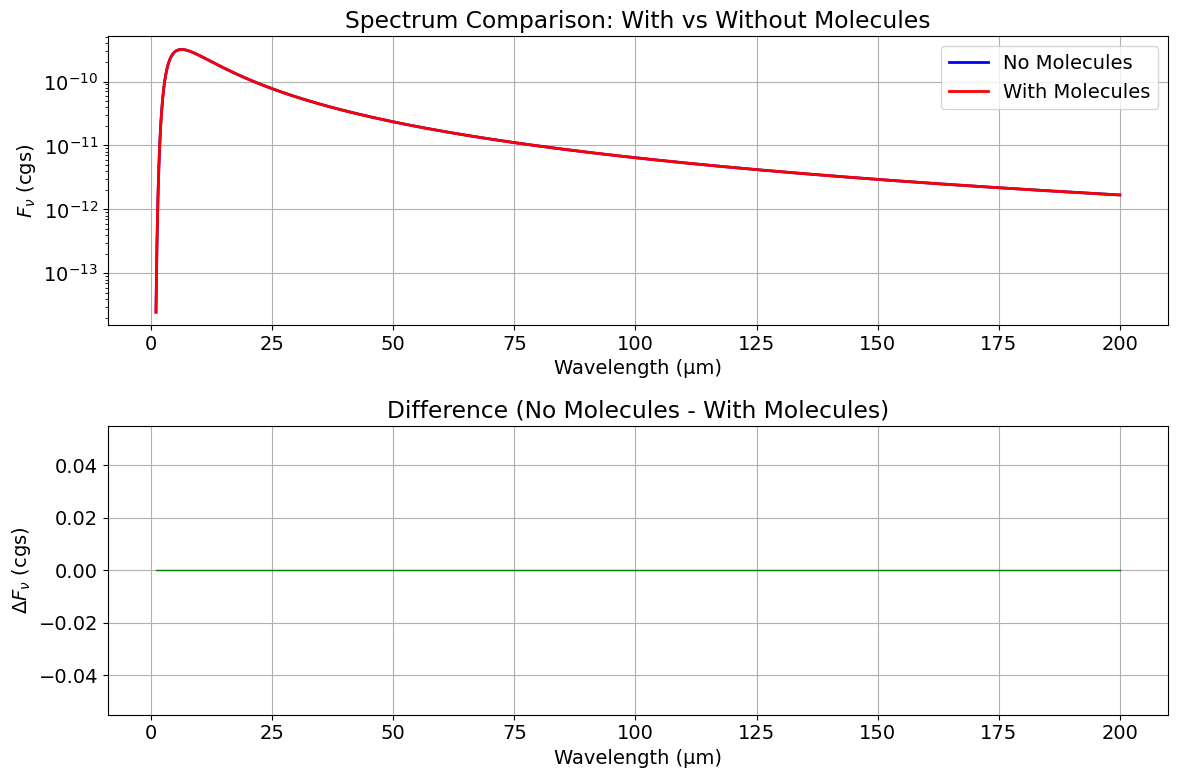

[GreyModel] apply_opacs: Loading opacities...
[GreyModel] load_opacities: Starting...
[GreyModel] load_opacities: Using cached result.
[GreyModel] apply_opacs: Calculating kappa_nu_bars for 50 tau points...
[GreyModel] spectrum: Calculating tau_nu for 1000 frequencies...
[GreyModel] spectrum: tau_nu done
[GreyModel] spectrum: Calculating Planck function for 50 tau points...
[GreyModel] spectrum: Computing final vectorized sum...
[GreyModel] apply_opacs: Loading opacities...
[GreyModel] load_opacities: Starting...
[GreyModel] load_opacities: Using cached result.
[GreyModel] apply_opacs: Calculating kappa_nu_bars for 50 tau points...
[GreyModel] spectrum: Calculating tau_nu for 1000 frequencies...
[GreyModel] spectrum: tau_nu done
[GreyModel] spectrum: Calculating Irradiation function for 50 tau points...
[GreyModel] spectrum: Computing final vectorized sum...
Max continuum flux: 3.18e-10 Hz3 s3 J / m2
[GreyModel] apply_opacs: Loading opacities...
[GreyModel] load_opacities: Starting...


In [7]:
# Replace your current cell with this debugging version
model_no_mol = GreyModel(Teff=1000, verbose=True, include_molecules=False)
model_with_mol = GreyModel(Teff=1000, verbose=True, include_molecules=True)

w = (c.c/model_no_mol.freqs).to_value(u.um)

# Plot comparison
plt.figure(figsize=(12, 8))

# Top plot: full spectrum comparison
plt.subplot(2, 1, 1)
plt.semilogy(w, model_no_mol.final_spectrum, 'b-', linewidth=2, label='No Molecules')
plt.semilogy(w, model_with_mol.final_spectrum, 'r-', linewidth=2, label='With Molecules')
plt.xlabel('Wavelength (μm)')
plt.ylabel(r'$F_\nu$ (cgs)')
plt.legend()
plt.title('Spectrum Comparison: With vs Without Molecules')
plt.grid(True)

# Bottom plot: difference (to see absorption features)
plt.subplot(2, 1, 2)
difference = model_no_mol.final_spectrum - model_with_mol.final_spectrum
plt.plot(w, difference, 'g-', linewidth=1)
plt.xlabel('Wavelength (μm)')
plt.ylabel(r'$\Delta F_\nu$ (cgs)')
plt.title('Difference (No Molecules - With Molecules)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print some diagnostics
print(f"Max continuum flux: {model_no_mol.final_spectrum.max():.2e}")
print(f"Max molecular flux: {model_with_mol.final_spectrum.max():.2e}")
print(f"Max difference: {difference.max():.2e}")
print(f"Min difference: {difference.min():.2e}")

[Abundances] T=144.0 KK, P=1.00e+06, n_total=5.03e+19 1 / K cm^-3
[Abundances] 1H2-16O: 5.03e+17 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 5.03e+17 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 5.03e+17 1 / K cm^-3 (mixing ratio: 1.00e-02)
Molecular abundances:
  1H2-16O: 5.03e+17 1 / K cm^-3
  14N-1H3: 5.03e+17 1 / K cm^-3
  12C-1H4: 5.03e+17 1 / K cm^-3
[MolecularLines] Computing opacity for T=144.0 KK, P=1.00e+06 dyne/cm^2
[MolecularLines] Frequency grid: 1000 points
[MolecularLines] Processing 1H2-16O...
[MolecularLines] 1H2-16O: Processing 100 lines...
[Debug] Line 0: nu0=4.51e+12 Hz, S=5.17e-18, boltzmann=2.60e-01
[Debug] line_strength_val=1.34e-18
[Debug] number_density_val=5.03e+17 cm^-3
[Debug] max(profile)=5.35e-19 Hz^-1
[Debug] max(opacity_contribution)=3.61e-01
[Debug] Line 1: nu0=2.77e+12 Hz, S=3.92e-18, boltzmann=6.55e-01
[Debug] line_strength_val=2.57e-18
[Debug] number_density_val=5.03e+17 cm^-3
[Debug] max(profile)=2.49e-18 Hz^-1
[Debug] m

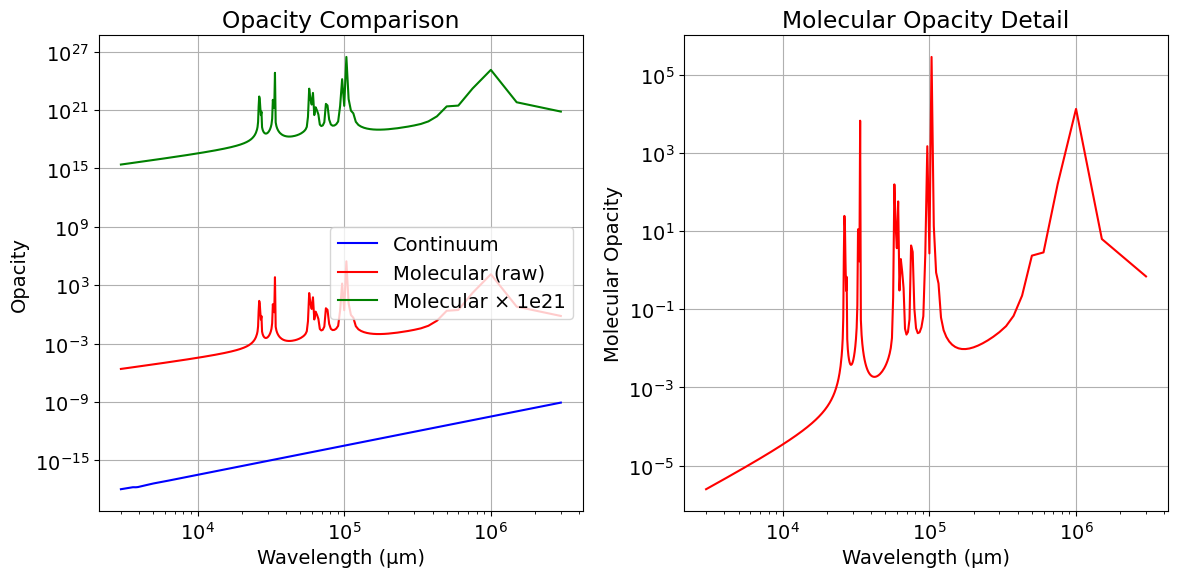

In [5]:
# Debug molecular opacity calculation
import numpy as np
from molecular_lines import MolecularLines
from abundances import estimate_molecular_abundances

# Test molecular opacity calculation directly
T_test = 144  * u.K # K
P_test = 1e6  # dyne/cm^2 (1 bar)
nu_test = np.linspace(1e12, 1e15, 1000)  # Hz

# Get molecular abundances
mol_abundances = estimate_molecular_abundances(T_test, P_test)
print("Molecular abundances:")
for mol, abund in mol_abundances.items():
    print(f"  {mol}: {abund:.2e} cm^-3")

# Calculate molecular opacity
csv_files = [
    '20251002055928/20251002055928__1H2-16O__144.0K.csv',
    '20251002055928/20251002055928__12C-1H4__144.0K.csv',
    '20251002055928/20251002055928__14N-1H3__144.0K.csv'
]
ml = MolecularLines(csv_files=csv_files)
kappa_mol = ml.compute_molecular_opacity(nu_grid=nu_test, T=T_test, P=P_test, molecule_abundances=mol_abundances)
print(f"\nMolecular opacity range: {kappa_mol.min():.2e} to {kappa_mol.max():.2e}")

# Compare to continuum opacity
from opac import kappa_cont
kappa_cont_test = kappa_cont(nu_test, np.log10(P_test), T_test)
print(f"Continuum opacity range: {kappa_cont_test.min():.2e} to {kappa_cont_test.max():.2e}")

if kappa_mol.max() > 0:
    ratio = kappa_mol.max() / kappa_cont_test.max()
    print(f"Max molecular/continuum opacity ratio: {ratio:.2e}")
    
    # Try scaling factors
    for scale in [1e15, 1e18, 1e21, 1e24]:
        scaled_ratio = (kappa_mol.max() * scale) / kappa_cont_test.max()
        print(f"With scaling factor {scale:.0e}: ratio = {scaled_ratio:.2e}")

# Plot the opacities
plt.figure(figsize=(12, 6))
wavelengths = (3e14 / nu_test) * 1e4  # Convert Hz to microns

plt.subplot(1, 2, 1)
plt.loglog(wavelengths, kappa_cont_test, 'b-', label='Continuum')
plt.loglog(wavelengths, kappa_mol, 'r-', label='Molecular (raw)')
plt.loglog(wavelengths, kappa_mol * 1e21, 'g-', label='Molecular × 1e21')
plt.xlabel('Wavelength (μm)')
plt.ylabel('Opacity')
plt.legend()
plt.title('Opacity Comparison')
plt.grid(True)

plt.subplot(1, 2, 2)
# Zoom in on molecular lines
if kappa_mol.max() > 0:
    plt.loglog(wavelengths, kappa_mol, 'r-', label='Molecular (raw)')
    plt.xlabel('Wavelength (μm)')
    plt.ylabel('Molecular Opacity')
    plt.title('Molecular Opacity Detail')
    plt.grid(True)

plt.tight_layout()
plt.show()